## LAB 5 - TASK 2 submission. ML 2024-25.
**AUTOENCODERS**


FILL UP THIS BOX WITH YOUR DETAILS

**NAME AND NIP**:
- Ignacio Pastore Benaim, 920576
- David Padilla Orenga, 946874


The following material is based on the official documentation from Keras and Tensorflow about Autoencoders. For more detailed info or help/hints for some of the questions asked here, you can read:
https://www.tensorflow.org/tutorials/generative/autoencoder
https://blog.keras.io/building-autoencoders-in-keras.html


Copyright 2020 The TensorFlow Authors.

In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

## 0. Set up

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Model

## 1. Train a basic autoencoder
Next you have the code to train a basic autoencoder using the Fashion MNIST  dataset. Each image is 28x28 pixels.
* You can run the current version to see how it works.
* Then, **CHANGE what's necessary** to train it for the CIFAR10 dataset from previous lab (note CIFAR images are 32x32x3, color images, let's **convert to grayscale** with the helper code provided below).

This basic autoencoder only has two Dense layers: an `encoder`, which compresses the images into a 64 dimensional latent vector, and a `decoder`, that reconstructs the original image from the latent space.

The model is trained using `x_train` as both the input and the target. The `encoder` will learn to compress the dataset from the initial dimensions (all the input pixels *streched out* as a single vector) to the latent space (64), and the `decoder` will learn to reconstruct the original images.


This is what you would get with the Fashion-MNIST dataset
![Basic autoencoder results](https://github.com/tensorflow/docs/blob/master/site/en/tutorials/generative/images/intro_autoencoder_result.png?raw=1)


In [3]:
# LOAD the data

# TO-DO LAB5: modify a few things when you want to train with CIFAR 10

# helper function to convert your images to grayscale
def grayscale(data, dtype='float32'):
    # luma coding weighted average in video systems to get grayscale
    r, g, b = np.asarray(.3, dtype=dtype), np.asarray(.59, dtype=dtype), np.asarray(.11, dtype=dtype)
    rst = r * data[:, :, :, 0] + g * data[:, :, :, 1] + b * data[:, :, :, 2]
    # add channel dimension
    rst = np.expand_dims(rst, axis=3)
    return rst

# TO-DO: CHANGE THIS CODE TO LOAD CIFAR 10
(x_train, _), (x_test, _) = cifar10.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# TO-DO: if you want to CONVERT TO GRAYSCALE
x_train = grayscale(x_train)
x_test = grayscale(x_test)

print (x_train.shape)
print (x_test.shape)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
(50000, 32, 32, 1)
(10000, 32, 32, 1)


In [4]:
# DEFINE the autoencoder model, compile it and train

# **************************************
# TO-DO LAB5: modify what's necesary in this class to make it a valid
# auto-encoder for CIFAR-10 images in grayscale
# **************************************

latent_dim = 64

class Autoencoder(Model):
  def __init__(self, latent_dim):
    super(Autoencoder, self).__init__()
    self.latent_dim = latent_dim
    self.encoder = tf.keras.Sequential([
      layers.Flatten(),
      layers.Dense(latent_dim, activation='relu'),
    ])
    self.decoder = tf.keras.Sequential([
      layers.Dense(1024, activation='sigmoid'),
      layers.Reshape((32, 32))
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = Autoencoder(latent_dim)

In [5]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [6]:
autoencoder.fit(x_train, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test, x_test))
print(autoencoder.summary())

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 0.0338 - val_loss: 0.0160
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 0.0152 - val_loss: 0.0140
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 0.0139 - val_loss: 0.0138
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.0136 - val_loss: 0.0137
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.0135 - val_loss: 0.0133
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - loss: 0.0133 - val_loss: 0.0133
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 0.0132 - val_loss: 0.0127
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.0127 - val_loss: 0.0127
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - loss: 0.0127 - val_loss: 0.0127
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0127 - val_loss: 0.0128


Model: "autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_1 (Sequential)            │ (None, 32, 32)              │          66,560 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 396,482 (1.51 MB)

 Trainable params: 132,160 (516.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 264,322 (1.01 MB)

None


Now that the model is trained, let's test it by encoding and decoding images from the test set.

In [7]:
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

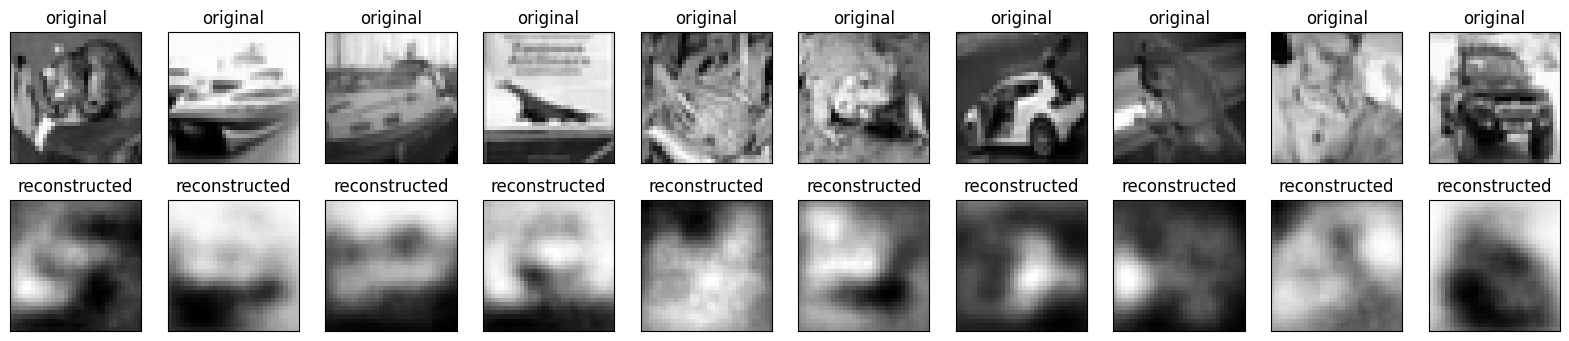

In [8]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i])
  #plt.imshow(x_test[i][:,:,0])
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i])
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

## 2. Now make the autoencoder CONVOLUTIONAL

The basic auto-encoder gets a decent work for such a simple model, but very blurred reconstructiosn. Let's train a convolutional autoencoder using  [Conv2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) layers in the `encoder`, and [Conv2DTranspose](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2DTranspose) layers in the `decoder`.


**TO-DO LAB5:**
* Use the gray-scale CIFAR-10 images from previous step 1.
* Fill the empty gaps to finish the definition of the Convolutional autoencoder

* Can you adapt the autoencoder to work with color images? Starting from a copy of the current AutoEncoderCONV class, program a new class *AutoEncoderCONV_COLOR*, train it and visualize some examples.

* Can you make the internal encoding of the image to be half size of what it is right now? Starting from a copy of the current AutoEncoderCONV class, program a new class *AutoEncoderCONV_SMALL*, train it and visualize some examples.



In [9]:
# let's reload the data in the right format for the CNN
# If you want to work with color images, re-load in color and do not apply the grayscale conversion for this version
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
# (x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

print (x_train.shape)
print (x_test.shape)

(50000, 32, 32, 3, 1)
(10000, 32, 32, 3, 1)


In [16]:
# DEFINITION OF THE AUTO-ENCODER

class AutoEncoderCONV(Model):
  def __init__(self):
    super(AutoEncoderCONV, self).__init__()

    # The encoder just consists of 2 convolutional layers.
    self.encoder = tf.keras.Sequential([
      # layers.Input(shape=(28, 28, 1)),
      layers.Input(shape=(32, 32, 1)),
      layers.Conv2D(16, (3,3), activation='relu', padding='same', strides=2),
      layers.Conv2D(8, (3,3), activation='relu', padding='same', strides=2)])

    # The decoder just consists of 2 convolutional layers
    self.decoder = tf.keras.Sequential([
      layers.Conv2DTranspose(8, kernel_size=3, strides=2, activation='relu', padding='same'),
      layers.Conv2DTranspose(16, kernel_size=3, strides=2, activation='relu', padding='same'),
      layers.Conv2D(1, kernel_size=(3,3), activation='sigmoid', padding='same')])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

class AutoEncoderCONV_COLOR(Model):
  def __init__(self):
    super(AutoEncoderCONV_COLOR, self).__init__()

    # The encoder just consists of 2 convolutional layers.
    self.encoder = tf.keras.Sequential([
      # layers.Input(shape=(28, 28, 1)),
      layers.Input(shape=(32, 32, 3)),
      layers.Conv2D(16, (3,3), activation='relu', padding='same', strides=2),
      layers.Conv2D(8, (3,3), activation='relu', padding='same', strides=2)])

    # The decoder just consists of 2 convolutional layers
    self.decoder = tf.keras.Sequential([
      layers.Conv2DTranspose(8, kernel_size=3, strides=2, activation='relu', padding='same'),
      layers.Conv2DTranspose(16, kernel_size=3, strides=2, activation='relu', padding='same'),
      # We need to change the n of channels to 3 (R,G,B) if we want to obtain the image colored
      layers.Conv2D(3, kernel_size=(3,3), activation='sigmoid', padding='same')])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

class AutoEncoderCONV_SMALL(Model):
  def __init__(self):
    super(AutoEncoderCONV_SMALL, self).__init__()

    # The encoder just consists of 2 convolutional layers.
    self.encoder = tf.keras.Sequential([
      # layers.Input(shape=(28, 28, 1)),
      layers.Input(shape=(32, 32, 1)),
      layers.Conv2D(16, (3,3), activation='relu', padding='same', strides=2),  # (32x32) -> (16x16)
      layers.Conv2D(8, (3,3), activation='relu', padding='same', strides=2),
      layers.Conv2D(4, (3,3), activation='relu', padding='same', strides=2)])

    # The decoder just consists of 2 convolutional layers
    self.decoder = tf.keras.Sequential([
      layers.Conv2DTranspose(4, kernel_size=3, strides=2, activation='relu', padding='same'),
      layers.Conv2DTranspose(8, kernel_size=3, strides=2, activation='relu', padding='same'),
      layers.Conv2DTranspose(16, kernel_size=3, strides=2, activation='relu', padding='same'), # (16x16) -> (32x32)
      layers.Conv2D(1, kernel_size=(3,3), activation='sigmoid', padding='same')])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded


In [ ]:
# OPTIONAL CODE. NOT REQUIRED. Run it if you want to load the TensorBoard notebook extension and add the callback to the training.
# What it does is to save a log of what's happening to visualize plots to monitor the training

# %load_ext tensorboard

# import datetime, os
# logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))

# %tensorboard --logdir logs

# tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)
# more details to configure this here:
# https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/TensorBoard

In [18]:
x_train_gray = grayscale(x_train)
x_test_gray = grayscale(x_test)

print("x_train_gray shape:", x_train_gray.shape)  # (50000, 32, 32, 1)
print("x_test_gray shape:", x_test_gray.shape)    # (10000, 32, 32, 1)
print("x_train shape:", x_train.shape)            # (50000, 32, 32, 3)
print("x_test shape:", x_test.shape)              # (10000, 32, 32, 3)

autoencoders = [
    {"name": "AutoEncoderCONV", "model": AutoEncoderCONV(), "data": (x_train_gray, x_test_gray)},
    {"name": "AutoEncoderCONV_COLOR", "model": AutoEncoderCONV_COLOR(), "data": (x_train, x_test)},
    {"name": "AutoEncoderCONV_SMALL", "model": AutoEncoderCONV_SMALL(), "data": (x_train_gray, x_test_gray)}
]
visualisation = 'OFF'  #@param ["ON", "OFF"]
callbacks = []

# Añadimos tensorboard si es necesario
if visualisation == 'ON':
    tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="./logs")
    callbacks = [tensorboard_callback]

# Bucle de entrenamiento para cada autoencoder
for autoencoder in autoencoders:
    print(f"\nEntrenando {autoencoder['name']}...")
    autoencoder["model"].compile(optimizer='adam', loss=losses.MeanSquaredError())
    autoencoder["model"].fit(autoencoder["data"][0], autoencoder["data"][0],
                            epochs=10,
                            shuffle=True,
                            validation_data=(autoencoder["data"][1], autoencoder["data"][1]),
                            callbacks=callbacks)

print("\nEntrenamiento completado. 🚀")

x_train_gray shape: (50000, 32, 32, 1, 1)
x_test_gray shape: (10000, 32, 32, 1, 1)
x_train shape: (50000, 32, 32, 3, 1)
x_test shape: (10000, 32, 32, 3, 1)

Entrenando AutoEncoderCONV...
Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 68s 42ms/step - loss: 0.0128 - val_loss: 0.0026
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 62s 39ms/step - loss: 0.0024 - val_loss: 0.0018
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 78s 37ms/step - loss: 0.0017 - val_loss: 0.0015
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 37ms/step - loss: 0.0014 - val_loss: 0.0013
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 36ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 36ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 58s 37ms/step - loss: 0.0010 - val_loss: 9.4686e-04
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 36ms/step - loss: 9.4487e-04 - val_loss: 8.9001e-04
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 36ms/step - loss: 8.9556e-04 - val_

In [21]:
# Encoded/Decoded Imaages for the GreyScale AutoEncoder
autoencoder_conv = autoencoders[0]["model"]
encoded_imgs = autoencoder_conv.encoder(x_test_gray).numpy()
decoded_imgs = autoencoder_conv.decoder(encoded_imgs).numpy()

# Encoded/Decoded Imaages for the Color AutoEncoder
autoencoder_color = autoencoders[1]["model"]
encoded_imgs_Color = autoencoder_color.encoder(x_test).numpy()
decoded_imgs_Color = autoencoder_color.decoder(encoded_imgs_Color).numpy()

# Encoded/Decoded Imaages for the SMALL AutoEncoder
autoencoder_small = autoencoders[2]["model"]
encoded_imgs_Small = autoencoder_small.encoder(x_test_gray).numpy()
decoded_imgs_Small = autoencoder_small.decoder(encoded_imgs_Small).numpy()

Autoencoder


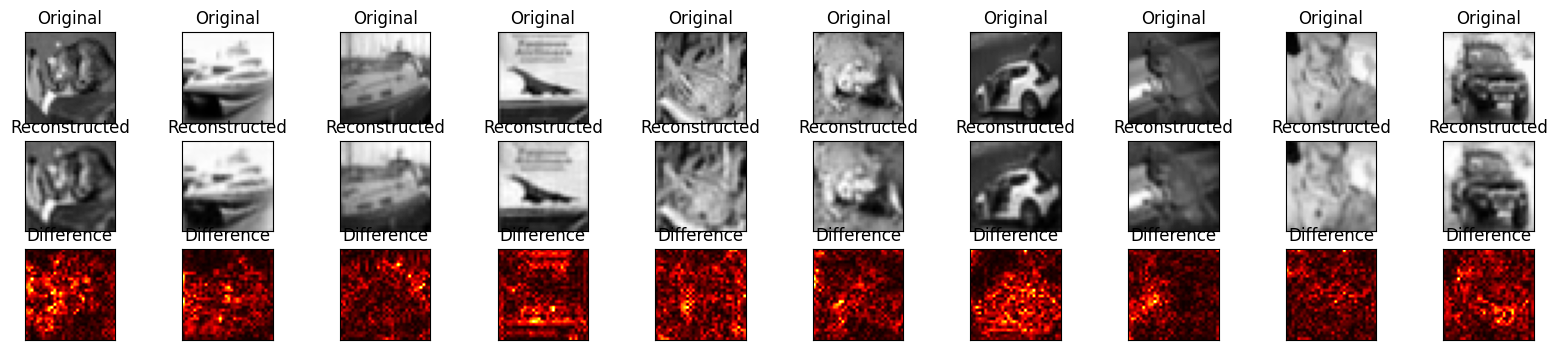

In [41]:
n = 10
print("Autoencoder")

plt.figure(figsize=(20, 4))
for i in range(n):

    # Display original
    ax = plt.subplot(3, n, i + 1)
    plt.title("Original")
    plt.imshow(x_test_gray[i].squeeze(), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    bx = plt.subplot(3, n, i + n + 1)
    plt.title("Reconstructed")
    plt.imshow(tf.squeeze(decoded_imgs[i]), cmap='gray')
    bx.get_xaxis().set_visible(False)
    bx.get_yaxis().set_visible(False)

    # Display differences

    diff = tf.squeeze(x_test_gray[i]) - tf.squeeze(decoded_imgs[i])
    diff_abs = np.abs(diff)
    cx = plt.subplot(3, n, i + 2*n + 1)
    plt.title("Difference")
    plt.imshow(diff_abs, cmap='hot')
    cx.get_xaxis().set_visible(False)
    cx.get_yaxis().set_visible(False)

plt.show()

COLOR Autoencoder


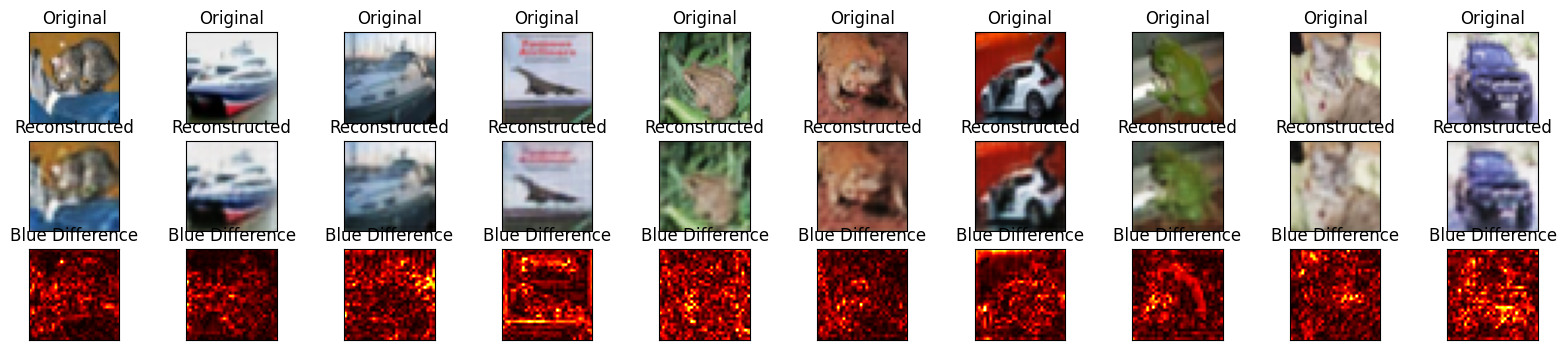

In [40]:
n = 10
print("COLOR Autoencoder")

plt.figure(figsize=(20, 4))
for i in range(n):

    # Display original
    ax = plt.subplot(3, n, i + 1)
    plt.title("Original")
    plt.imshow(tf.squeeze(x_test[i]))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    bx = plt.subplot(3, n, i + n + 1)
    plt.title("Reconstructed")
    plt.imshow(tf.squeeze(decoded_imgs_Color[i]))
    bx.get_xaxis().set_visible(False)
    bx.get_yaxis().set_visible(False)

    # Display differences for each channel
    diff = tf.squeeze(x_test[i]) - tf.squeeze(decoded_imgs_Color[i])  # Shape: (32, 32, 3)

    for channel_idx, channel_name in enumerate(['Red', 'Green', 'Blue']):
        diff_channel = diff[:, :, channel_idx]
        diff_abs_scaled = np.abs(diff_channel) * 255

        cx = plt.subplot(3, n, i + (channel_idx + 2) * n + 1 - channel_idx * n)
        plt.title(f"{channel_name} Difference")
        plt.imshow(diff_abs_scaled, cmap='hot')
        cx.get_xaxis().set_visible(False)
        cx.get_yaxis().set_visible(False)

plt.show()

SMALL Autoencoder


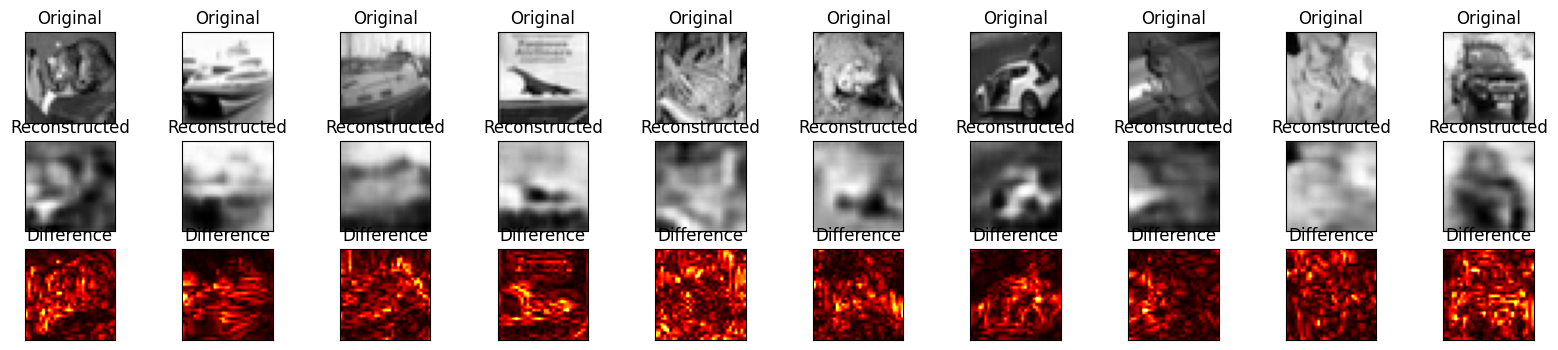

In [39]:
n = 10
print("SMALL Autoencoder")
plt.figure(figsize=(20, 4))
for i in range(n):

    # Display original
    ax = plt.subplot(3, n, i + 1)
    plt.title("Original")
    # x_test contains color images, so display them directly with imshow
    plt.imshow(x_test_gray[i].squeeze(), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    bx = plt.subplot(3, n, i + n + 1)
    plt.title("Reconstructed")
    plt.imshow(tf.squeeze(decoded_imgs_Small[i]), cmap='gray')
    bx.get_xaxis().set_visible(False)
    bx.get_yaxis().set_visible(False)

    # Display differences

    diff = tf.squeeze(x_test_gray[i]) - tf.squeeze(decoded_imgs_Small[i])
    diff_abs = np.abs(diff)
    cx = plt.subplot(3, n, i + 2*n + 1)
    plt.title("Difference")
    plt.imshow(diff_abs, cmap='hot')
    cx.get_xaxis().set_visible(False)
    cx.get_yaxis().set_visible(False)

plt.show()

### **QUESTION 1**:
The encoder reduces the size of the input, and then the decoder upsamples back to 32x32. What's the size of the latent encoding obtained by the network for one of the input 32x32 patches?. What would be the maximum encoding size that would make sense to you? why?


**The latent encoding size (max reduction) is 8x8x8 = 512 values (for the std greyscale AE). A maximum size of 512 is reasonable since it is a good size to balance compression and information retention for feature learning. We think that larger sizes would risk overfitting and memorization, avoiding the learning of valuable representations. On the other hand, fewer values would increase compression but risk losing details, resulting in blurry reconstructions (SMALL AE).**


In [44]:
# write any code you may need to help you get this question answers
# (e.g. the summary of all both encoder/decoder is a good way to explore this)
print("STD Encoder Summary:")
autoencoder_conv.encoder.summary()

# Print decoder summary
print("\n STD Decoder Summary:")
autoencoder_conv.decoder.summary()

print("SMALL Encoder Summary:")
autoencoder_small.encoder.summary()

# Print decoder summary
print("\n SMALLDecoder Summary:")
autoencoder_small.decoder.summary()

STD Encoder Summary:


Model: "sequential_32"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_50 (Conv2D)                   │ (None, 16, 16, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_51 (Conv2D)                   │ (None, 8, 8, 8)             │           1,160 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,320 (5.16 KB)

 Trainable params: 1,320 (5.16 KB)

 Non-trainable params: 0 (0.00 B)


 STD Decoder Summary:


Model: "sequential_33"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_transpose_35                  │ (None, 16, 16, 8)           │             584 │
│ (Conv2DTranspose)                    │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_36                  │ (None, 32, 32, 16)          │           1,168 │
│ (Conv2DTranspose)                    │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_52 (Conv2D)                   │ (None, 32, 32, 1)           │             145 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,897 (7.41 KB)

 Trainable params: 1,897 (7.41 KB)

 Non-trainable params: 0 (0.00 B)

SMALL Encoder Summary:


Model: "sequential_36"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_56 (Conv2D)                   │ (None, 16, 16, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_57 (Conv2D)                   │ (None, 8, 8, 8)             │           1,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_58 (Conv2D)                   │ (None, 4, 4, 4)             │             292 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,612 (6.30 KB)

 Trainable params: 1,612 (6.30 KB)

 Non-trainable params: 0 (0.00 B)


 SMALLDecoder Summary:


Model: "sequential_37"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_transpose_39                  │ (None, 8, 8, 4)             │             148 │
│ (Conv2DTranspose)                    │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_40                  │ (None, 16, 16, 8)           │             296 │
│ (Conv2DTranspose)                    │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_41                  │ (None, 32, 32, 16)          │           1,168 │
│ (Conv2DTranspose)                    │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_59 (Conv2D)                   │ (None, 32, 32, 1)           │             145 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,757 (6.86 KB)

 Trainable params: 1,757 (6.86 KB)

 Non-trainable params: 0 (0.00 B)

### **QUESTION 2**: Plot a few pairs of images: original vs recovered by the network

**Save one of these plots for each of the three auto-encoders trained** (Required the basic grayscale one. If you want to have full score for this task, you need the other two modifications proposed: color images and/or smaller size of the internal encoding of the image).

**It's being done in the precious section.**

In [ ]:
# in case you can't believe how good it looks ...
# substract the images to verify they are not just identical by mistake :-)
# print(x_test.shape, encoded_imgs.shape, decoded_imgs.shape)
# aux = x_test[0]-decoded_imgs[0]
# print("Sum of differences per pixel for one example {} ".format(np.sum(np.sum(aux))))

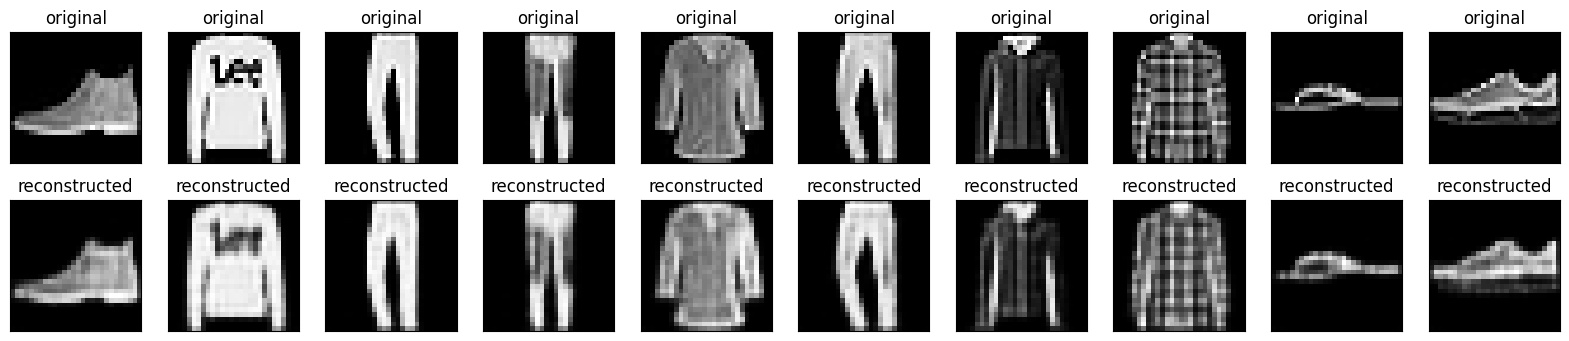

In [ ]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):

    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.title("original")
    plt.imshow(tf.squeeze(x_test[i]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    bx = plt.subplot(2, n, i + n + 1)
    plt.title("reconstructed")
    plt.imshow(tf.squeeze(decoded_imgs[i]))
    plt.gray()
    bx.get_xaxis().set_visible(False)
    bx.get_yaxis().set_visible(False)
plt.show()

## 3. Anomaly detection using autoencoders

Let's see a different example, with other data types. You will train a deep autoencoder now to detect anomalies on the [ECG5000 dataset](http://www.timeseriesclassification.com/description.php?Dataset=ECG5000). This dataset contains 5,000 [Electrocardiograms](https://en.wikipedia.org/wiki/Electrocardiography), each with 140 data points. We use a simplified version of the dataset, where each example has been labeled either `0` (corresponding to an abnormal rhythm), or `1` (corresponding to a normal rhythm).

*How could you detect anomalies in large datasets using an autoencoder if you wouldn't have annotated data?* (now we will use the labels to verify the quality of what we're getting).

An autoencoder is trained to minimize reconstruction error, so we will train an autoencoder on the normal rhythms only, then use it to reconstruct all the data. The hypothesis is that the abnormal rhythms will have higher reconstruction error, so we can identify a rhythm as an anomaly if the reconstruction error surpasses a fixed threshold.

### Load ECG data

The dataset you will use is based on one from [timeseriesclassification.com](http://www.timeseriesclassification.com/description.php?Dataset=ECG5000).


In [45]:
# Download the dataset
dataframe = pd.read_csv('http://storage.googleapis.com/download.tensorflow.org/data/ecg.csv', header=None)
raw_data = dataframe.values
# visualize a few values:
dataframe.head()


,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,-0.477492,...,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1.0
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1.0
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1.0
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1.0
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1.0


In [64]:
# Prepare the data

# The last element contains the labels, the rest is the electrocadriogram data
labels = raw_data[:, -1]
data = raw_data[:, 0:-1]

train_data, test_data, train_labels, test_labels = train_test_split(
    data, labels, test_size=0.2, random_state=21
)

# Normalize the data to [0,1]
min_val = tf.reduce_min(train_data)
max_val = tf.reduce_max(train_data)

train_data = (train_data - min_val) / (max_val - min_val)
test_data = (test_data - min_val) / (max_val - min_val)

train_data = tf.cast(train_data, tf.float32)
test_data = tf.cast(test_data, tf.float32)

# SPLIT the normal (label 1) and abnormal (label 0) rhythms data
train_labels = train_labels.astype(bool)
test_labels = test_labels.astype(bool)

normal_train_data = train_data[train_labels]
normal_test_data = test_data[test_labels]

anomalous_train_data = train_data[~train_labels]
anomalous_test_data = test_data[~test_labels]

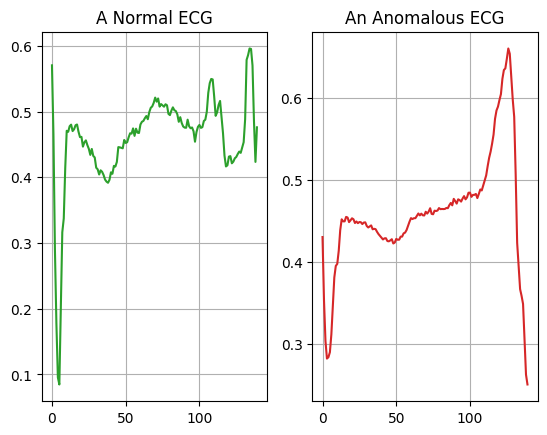

In [47]:
# Plot an example of normal and abnormal ECG
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(np.arange(140), normal_train_data[0], 'tab:green')
ax1.set_title('A Normal ECG')
ax1.grid()
ax2.plot(np.arange(140), anomalous_train_data[0], 'tab:red')
ax2.set_title("An Anomalous ECG")
ax2.grid()

### Build the model

### **QUESTION 3:** Finish the **implementation** of the auto-encoder.
It should learn a latent **representation of 8 values**. We want the network to have 3 Dense layers as encoder and 3 Dense layers as decoder, with **less than 6000 parameters** in total.

How many parameters has your first dense layer? Can you tell how is that number computed?


ANSWER 1: [YOUR ANSWER HERE] (max 2 lines)

In [75]:
import tensorflow as tf
from tensorflow.keras import Model, layers

class AnomalyDetector(Model):
    def __init__(self):
        super(AnomalyDetector, self).__init__()
        self.encoder = tf.keras.Sequential([
            layers.Dense(16, activation="relu", input_shape=(140,)), # (140 + 1) * 16 = 2256
            layers.Dense(12, activation="relu"),                     # (16 + 1) * 12 = 204
            layers.Dense(8, activation="relu")                       # (12 + 1) * 8 = 104
        ])                                                           # TOTAL ENCODER = 2564

        self.decoder = tf.keras.Sequential([
            layers.Dense(12, activation="relu"),                     # (8 + 1) * 12 = 108
            layers.Dense(16, activation="relu"),                     # (12 + 1) * 16 = 208
            layers.Dense(140, activation="sigmoid")                  # (16 + 1) * 140 = 2380
        ])                                                           # TOTAL DECODER = 2696

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

autoencoder = AnomalyDetector()
autoencoder.compile(optimizer='adam', loss='mae')

autoencoder.encoder.summary()
autoencoder.decoder.summary()



Model: "sequential_52"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_46 (Dense)                     │ (None, 16)                  │           2,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_47 (Dense)                     │ (None, 12)                  │             204 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_48 (Dense)                     │ (None, 8)                   │             104 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,564 (10.02 KB)

 Trainable params: 2,564 (10.02 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_53"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_49 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_50 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_51 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Notice that the autoencoder is trained using only the normal ECGs, but it is evaluated using the full **test set**.

Epoch 1/32
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.0575 - val_loss: 0.0529
Epoch 2/32
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0555 - val_loss: 0.0515
Epoch 3/32
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0531 - val_loss: 0.0503
Epoch 4/32
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0510 - val_loss: 0.0490
Epoch 5/32
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0487 - val_loss: 0.0475
Epoch 6/32
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0463 - val_loss: 0.0462
Epoch 7/32
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0437 - val_loss: 0.0450
Epoch 8/32
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0410 - val_loss: 0.0436
Epoch 9/32
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0386 - val_loss: 0.0425
Epoch 10/32
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0363 - val_loss: 0.0414
Epoch 11/32
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0339 - val_loss: 0.0404
Epoch 12/32
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0321 - val_loss: 0.0395
E

Model: "sequential_52"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_46 (Dense)                     │ (None, 16)                  │           2,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_47 (Dense)                     │ (None, 12)                  │             204 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_48 (Dense)                     │ (None, 8)                   │             104 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,564 (10.02 KB)

 Trainable params: 2,564 (10.02 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_53"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_49 (Dense)                     │ (None, 12)                  │             108 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_50 (Dense)                     │ (None, 16)                  │             208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_51 (Dense)                     │ (None, 140)                 │           2,380 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,696 (10.53 KB)

 Trainable params: 2,696 (10.53 KB)

 Non-trainable params: 0 (0.00 B)

Model: "anomaly_detector_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_52 (Sequential)           │ (None, 8)                   │           2,564 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_53 (Sequential)           │ (None, 140)                 │           2,696 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,782 (61.65 KB)

 Trainable params: 5,260 (20.55 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 10,522 (41.11 KB)

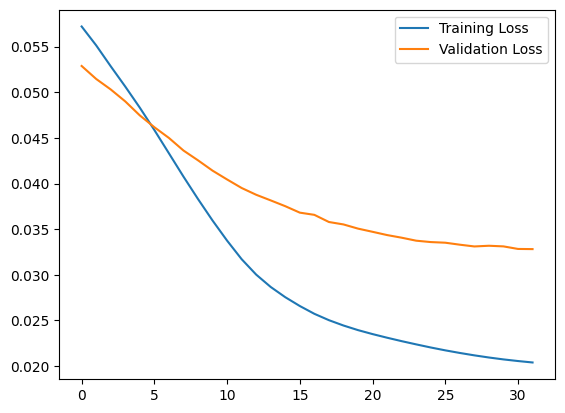

In [76]:
history = autoencoder.fit(normal_train_data, normal_train_data,
          epochs=32,
          batch_size=512,
          validation_data=(test_data, test_data),
          shuffle=True)

plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()

autoencoder.encoder.summary()
autoencoder.decoder.summary()
autoencoder.summary()

**The validation loss continues to decrease along with the training loss. This indicates that the model is not overfitting the training data. Both losses are consistently decreasing, but not yet converging to an absolute minimum. It may be useful to train for more epochs to further reduce the loss. We've adjusted the n of epoch a little bit**

Let's visualize some results (original ECG, reconstruction after it's encoded and decoded by the autoencoder, and the reconstruction error) for normal and abnormal ECG examples

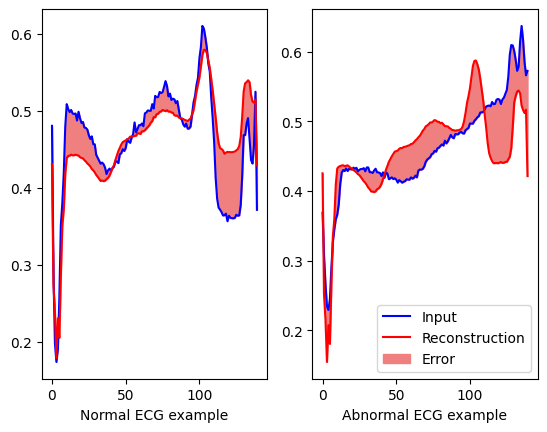

In [77]:
# normal ECG
encoded_ecgs = autoencoder.encoder(normal_test_data).numpy()
decoded_ecgs = autoencoder.decoder(encoded_ecgs).numpy()

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(normal_test_data[0],'b')
ax1.plot(decoded_ecgs[0],'r')
ax1.fill_between(np.arange(140), decoded_ecgs[0], normal_test_data[0], color='lightcoral' )
ax1.set_xlabel("Normal ECG example")

# abnormal ECG
encoded_ecgs = autoencoder.encoder(anomalous_test_data).numpy()
decoded_ecgs = autoencoder.decoder(encoded_ecgs).numpy()

ax2.plot(anomalous_test_data[0],'b')
ax2.plot(decoded_ecgs[0],'r')
ax2.fill_between(np.arange(140), decoded_ecgs[0], anomalous_test_data[0], color='lightcoral' )
ax2.set_xlabel("Abnormal ECG example")
ax2.legend(labels=["Input", "Reconstruction", "Error"])


**The reconstruction of a normal ECG has a fairly good intuition of the shape although it has errors probably due to the fact that the model can still be better trained with more data. In the case of an abnormal ECG, the model reconstruction has larger errors compared to the input. The model fails to capture the unusual or anomalous patterns with the same accuracy as in the normal ECG. We think this is positive, since the increased error in the reconstruction is precisely what allows anomalies to be detected.**

### Detect anomalies

To *detect* anomalies we'll see if the reconstruction loss is greater than a fixed threshold. In this example, one standard deviation from the mean average error for normal examples in the training set.

Plot the reconstruction error on normal ECGs from the training set and on abnormal ECGs from the test set. Let's also compute the average error on trainin data to establish our *normality* threshold.

74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Threshold to be considered a normal ECG:  0.032282747
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Text(0.5, 0, 'Error in TEST (anomalous) images')

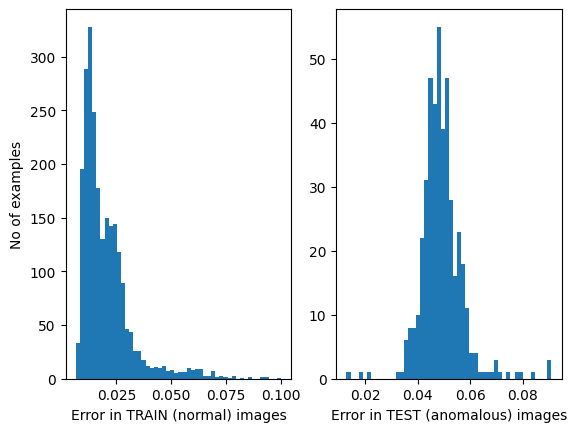

In [95]:
reconstructions = autoencoder.predict(normal_train_data)
train_loss = tf.keras.losses.mae(reconstructions, normal_train_data)

threshold = np.mean(train_loss) + np.std(train_loss)
print("Threshold to be considered a normal ECG: ", threshold)

reconstructions = autoencoder.predict(anomalous_test_data)
test_loss = tf.keras.losses.mae(reconstructions, anomalous_test_data)

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.hist(train_loss, bins=50)
ax1.set_xlabel("Error in TRAIN (normal) images")
ax1.set_ylabel("No of examples")

ax2.hist(test_loss, bins=50)
ax2.set_xlabel("Error in TEST (anomalous) images")


**In the NORMAL case, most of the errors are concentrated below 0.0323. This confirms that the selected threshold correctly captures most of the normal examples. The highest errors are point cases but they are very few.**


**The distribution of errors in anomalous data is clearly shifted to the right compared the threshold (0.0323), which is good because it means that the model is managing to distinguish anomalies.**

Classify an ECG as an anomaly if the reconstruction error is greater than the threshold. By varing this threshold, you can adjust the precision and recall of your classifier.

### **QUESTION 4:**
* In this particular example, you are predicting possible abnormal ECG. What would you prefer to maximize? Precision or Recall? Explain why.

**It is most important to maximize Recall so as not to miss any abnormal ECGs, as a false negative (undetected abnormality) could put the patient's health at risk. Although false positives (normals classified as abnormal) may generate additional testing, it is a minor risk compared to missing a critical diagnosis.**


* Besides, in order to analyze in more detail the results here, estimate how much normal ECG has been predicted as abnormal and viceversa? (if you need additional code, add it to the final code cell)

ANSWER 2: [YOUR-ANSWER-HERE] (max 4 lines)

In [80]:
def predict(model, data, threshold):
  reconstructions = model(data)
  loss = tf.keras.losses.mae(reconstructions, data)
  return tf.math.less(loss, threshold)

def print_stats(predictions, labels):
  print("Accuracy = {0:.3f}".format(accuracy_score(labels, preds)))
  print("Precision = {0:.3f}".format(precision_score(labels, preds)))
  print("Recall = {0:.3f}".format(recall_score(labels, preds)))

In [96]:
from sklearn.metrics import confusion_matrix

preds = predict(autoencoder, test_data, threshold)
print_stats(preds, test_labels)

# Calculate confusion matrix
cm = confusion_matrix(test_labels, preds)
tn, fp, fn, tp = cm.ravel()

# Show additional details
print("\nResultados detallados:")
print(f"Normal predicted as abnormal (False Positives): {fp}")
print(f"Abnormal predicted as normal (False Negatives): {fn}")

Accuracy = 0.944
Precision = 0.992
Recall = 0.907

Resultados detallados:
Normal predicted as abnormal (False Positives): 4
Abnormal predicted as normal (False Negatives): 52


**The model has high accuracy, but focuses on avoiding false positives.
It is necessary to maximize Recall (sensitivity) to reduce false negatives, since in a medical context, not detecting an anomaly is more serious than being wrong with a false positive. Threshold must be modified.**

### **ITERATION TO MAXIMISE RECALL**


74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Threshold to be considered a normal ECG:  0.0425
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Text(0.5, 0, 'Error in TEST (anomalous) images')

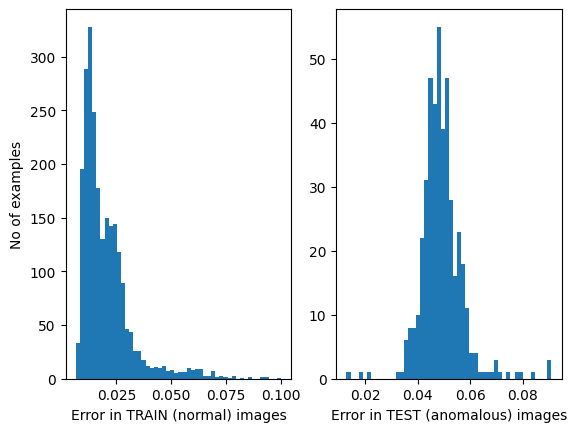

In [97]:
reconstructions = autoencoder.predict(normal_train_data)
train_loss = tf.keras.losses.mae(reconstructions, normal_train_data)

threshold = 0.0425
print("Threshold to be considered a normal ECG: ", threshold)

reconstructions = autoencoder.predict(anomalous_test_data)
test_loss = tf.keras.losses.mae(reconstructions, anomalous_test_data)

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.hist(train_loss, bins=50)
ax1.set_xlabel("Error in TRAIN (normal) images")
ax1.set_ylabel("No of examples")

ax2.hist(test_loss, bins=50)
ax2.set_xlabel("Error in TEST (anomalous) images")

In [98]:

preds = predict(autoencoder, test_data, threshold)
print_stats(preds, test_labels)

# Calculate confusion matrix
cm = confusion_matrix(test_labels, preds)
tn, fp, fn, tp = cm.ravel()

# Show additional details
print("\nResultados detallados:")
print(f"Normal predicted as abnormal (False Positives): {fp}")
print(f"Abnormal predicted as normal (False Negatives): {fn}")

Accuracy = 0.914
Precision = 0.900
Recall = 0.952

Resultados detallados:
Normal predicted as abnormal (False Positives): 59
Abnormal predicted as normal (False Negatives): 27


**By increasing the threshold to 0.0425, the Recall improves to 95.2%, which is crucial for not missing anomalies. Although the Precision has dropped to 90.0%, the increase in Recall is a good trade-off in a medical context. By varying the threshold we can find a compromise between precision and recall by prioritizing recall.**